# Text Classification

In [1]:
import numpy as np
import pandas as pd  
import nltk 

# Get the data and take a look

In [2]:
import os

def read_dataset(split='train'):
    path = 'IMDb'
    
    x, y = [], []
    for line in open(os.path.join(path, split, 'imdb_%s_pos.txt' % split)):
        line = line.strip()
        x.append(line)
        y.append(1)
        
    for line in open(os.path.join(path, split, 'imdb_%s_neg.txt' % split)):
        line = line.strip()
        x.append(line)
        y.append(-1)
        
    return x, y

In [3]:
x_train, y_train = read_dataset(split='train')
x_dev, y_dev = read_dataset(split='dev')
x_test, y_test = read_dataset(split='test')

print 'number of train/dev/split =', len(y_train), len(y_dev), len(y_test)

number of train/dev/split = 15000 5000 5000


# Prepape features for ML 

- bow
- tfidf

In [4]:
#bow features
from sklearn.feature_extraction.text import CountVectorizer #tokenizes and counts words

# build bag of words features' vectorizer and get features
bow_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
bow_x_train = bow_vectorizer.fit_transform(x_train)
bow_x_dev = bow_vectorizer.transform(x_dev) 
bow_x_test = bow_vectorizer.transform(x_test) 

In [5]:
# tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()

tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
tfidf_x_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_x_dev = tfidf_vectorizer.transform(x_dev) 
tfidf_x_test = tfidf_vectorizer.transform(x_test)  

# Define metrics for evaluation

In [6]:
from sklearn import metrics

# define a function to evaluate our classification models based on four metrics
def get_metrics(true_labels, predicted_labels):
    
    acc = np.round(metrics.accuracy_score(true_labels, predicted_labels), 2)
    precision = np.round(metrics.precision_score(true_labels, predicted_labels), 2)
    recall = np.round(metrics.recall_score(true_labels, predicted_labels), 2)
    f1_score = np.round(metrics.f1_score(true_labels, predicted_labels), 2)
    
    print('Accuracy  Precision  Recall    F1 score')
    print('%8.2f %8.2f %8.2f %8.2f'%(acc, precision, recall, f1_score))
                        

# Define how to train and evaluate classifier

In [7]:
# define a function that trains the model, performs predictions and evaluates the predictions
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    # evaluate model prediction performance   
    get_metrics(true_labels=test_labels, 
                predicted_labels=predictions)
    return predictions    

# Train classifers with bow features
### use dev set for hyper-parameter finding

- Multinomial NB
- linear SVM
- Decision Tree
- Random Forest

### Bag of words feature

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
# no hyperparameters for Naive Bayes model
mnb = MultinomialNB()

# Multinomial Naive Bayes with bag of words features
predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_x_train,
                                           train_labels=y_train,
                                           test_features=bow_x_dev,
                                           test_labels=y_dev)

Accuracy  Precision  Recall    F1 score
    0.85     0.87     0.82     0.85


In [10]:
# SVM with bag of words features
# hyper-param: C, controls the tolerance of misleading points for SVM
Clist = [1e-4, 1e-3, 1e-2, .1, .5, 1., 5., 10.]

for c in Clist:
    svm = LinearSVC(C=c)
    print('C =', c)
    predictions = train_predict_evaluate_model(classifier=svm,
                                               train_features=bow_x_train,
                                               train_labels=y_train,
                                               test_features=bow_x_dev,
                                               test_labels=y_dev)

('C =', 0.0001)
Accuracy  Precision  Recall    F1 score
    0.84     0.83     0.85     0.84
('C =', 0.001)
Accuracy  Precision  Recall    F1 score
    0.88     0.87     0.89     0.88
('C =', 0.01)
Accuracy  Precision  Recall    F1 score
    0.88     0.88     0.89     0.88
('C =', 0.1)


d:\python27\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy  Precision  Recall    F1 score
    0.88     0.87     0.88     0.88
('C =', 0.5)
Accuracy  Precision  Recall    F1 score
    0.87     0.87     0.87     0.87
('C =', 1.0)
Accuracy  Precision  Recall    F1 score
    0.87     0.87     0.87     0.87
('C =', 5.0)
Accuracy  Precision  Recall    F1 score
    0.87     0.87     0.87     0.87
('C =', 10.0)
Accuracy  Precision  Recall    F1 score
    0.86     0.86     0.87     0.87


In [11]:
#Decision tree with bag of words features
# hyper-param: max_depth, controls the maximum depth of a decision tree (too deep may lead to overfitting)
Dlist = [3, 5, 10, 20, 50]

for d in Dlist:
    dt = DecisionTreeClassifier(max_depth=d)
    print('max depth =', d)
    predictions = train_predict_evaluate_model(classifier=dt,
                                               train_features=bow_x_train,
                                               train_labels=y_train,
                                               test_features=bow_x_dev,
                                               test_labels=y_dev)

('max depth =', 3)
Accuracy  Precision  Recall    F1 score
    0.67     0.62     0.90     0.73
('max depth =', 5)
Accuracy  Precision  Recall    F1 score
    0.69     0.64     0.90     0.75
('max depth =', 10)
Accuracy  Precision  Recall    F1 score
    0.72     0.67     0.87     0.76
('max depth =', 20)
Accuracy  Precision  Recall    F1 score
    0.72     0.70     0.80     0.75
('max depth =', 50)
Accuracy  Precision  Recall    F1 score
    0.71     0.71     0.72     0.72


In [12]:
#random forest with bag of words features
Nlist = [10, 20, 50, 100, 200]

for n in Nlist:
    rf = RandomForestClassifier(n_estimators=n, max_depth=20)
    print('number of base estimators =', n)
    predictions = train_predict_evaluate_model(classifier=rf,
                                               train_features=bow_x_train,
                                               train_labels=y_train,
                                               test_features=bow_x_dev,
                                               test_labels=y_dev)

('number of base estimators =', 10)
Accuracy  Precision  Recall    F1 score
    0.75     0.74     0.78     0.76
('number of base estimators =', 20)
Accuracy  Precision  Recall    F1 score
    0.79     0.79     0.81     0.80
('number of base estimators =', 50)
Accuracy  Precision  Recall    F1 score
    0.82     0.81     0.83     0.82
('number of base estimators =', 100)
Accuracy  Precision  Recall    F1 score
    0.83     0.82     0.86     0.84
('number of base estimators =', 200)
Accuracy  Precision  Recall    F1 score
    0.85     0.83     0.87     0.85


### TFIDF feature

In [13]:
# no hyperparameters for Naive Bayes model
mnb = MultinomialNB()

# Multinomial Naive Bayes with tf-idf feature
predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_x_train,
                                           train_labels=y_train,
                                           test_features=tfidf_x_dev,
                                           test_labels=y_dev)

Accuracy  Precision  Recall    F1 score
    0.87     0.90     0.84     0.87


In [14]:
# SVM with tf-idf feature
# hyper-param: C, controls the tolerance of misleading points for SVM
Clist = [1e-4, 1e-3, 1e-2, .1, .5, 1., 5., 10.]

for c in Clist:
    svm = LinearSVC(C=c)
    print('C =', c)
    predictions = train_predict_evaluate_model(classifier=svm,
                                               train_features=tfidf_x_train,
                                               train_labels=y_train,
                                               test_features=tfidf_x_dev,
                                               test_labels=y_dev)

('C =', 0.0001)
Accuracy  Precision  Recall    F1 score
    0.73     0.85     0.56     0.67
('C =', 0.001)
Accuracy  Precision  Recall    F1 score
    0.79     0.78     0.80     0.79
('C =', 0.01)
Accuracy  Precision  Recall    F1 score
    0.84     0.82     0.86     0.84
('C =', 0.1)
Accuracy  Precision  Recall    F1 score
    0.89     0.88     0.90     0.89
('C =', 0.5)
Accuracy  Precision  Recall    F1 score
    0.90     0.89     0.91     0.90
('C =', 1.0)
Accuracy  Precision  Recall    F1 score
    0.90     0.89     0.90     0.90
('C =', 5.0)
Accuracy  Precision  Recall    F1 score
    0.89     0.88     0.90     0.89
('C =', 10.0)
Accuracy  Precision  Recall    F1 score
    0.89     0.88     0.90     0.89


In [15]:
# Decision tree with tf-idf feature
# hyper-param: max_depth, controls the maximum depth of a decision tree (too deep may lead to overfitting)
Dlist = [3, 5, 10, 20, 50]

for d in Dlist:
    dt = DecisionTreeClassifier(max_depth=d)
    print('max depth =', d)
    predictions = train_predict_evaluate_model(classifier=dt,
                                               train_features=tfidf_x_train,
                                               train_labels=y_train,
                                               test_features=tfidf_x_dev,
                                               test_labels=y_dev)

('max depth =', 3)
Accuracy  Precision  Recall    F1 score
    0.67     0.62     0.88     0.73
('max depth =', 5)
Accuracy  Precision  Recall    F1 score
    0.69     0.63     0.91     0.75
('max depth =', 10)
Accuracy  Precision  Recall    F1 score
    0.72     0.67     0.87     0.76
('max depth =', 20)
Accuracy  Precision  Recall    F1 score
    0.72     0.69     0.81     0.74
('max depth =', 50)
Accuracy  Precision  Recall    F1 score
    0.71     0.71     0.72     0.71


In [16]:
#random forest with tf-idf feature
# hyper-param: n_estimators, control to use how many base estimators to form a forest
Nlist = [10, 20, 50, 100, 200]

for n in Nlist:
    rf = RandomForestClassifier(n_estimators=n, max_depth=20)
    print('number of base estimators =', n)
    # Multinomial Naive Bayes with bag of words features
    predictions = train_predict_evaluate_model(classifier=rf,
                                               train_features=tfidf_x_train,
                                               train_labels=y_train,
                                               test_features=tfidf_x_dev,
                                               test_labels=y_dev)

('number of base estimators =', 10)
Accuracy  Precision  Recall    F1 score
    0.74     0.74     0.76     0.75
('number of base estimators =', 20)
Accuracy  Precision  Recall    F1 score
    0.78     0.78     0.79     0.78
('number of base estimators =', 50)
Accuracy  Precision  Recall    F1 score
    0.81     0.81     0.82     0.81
('number of base estimators =', 100)
Accuracy  Precision  Recall    F1 score
    0.82     0.83     0.82     0.83
('number of base estimators =', 200)
Accuracy  Precision  Recall    F1 score
    0.83     0.83     0.84     0.84


# Test classifers

### with their best parameters on the suitable features
### and compare their performance

In [17]:
mnb = MultinomialNB()
predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_x_train,
                                           train_labels=y_train,
                                           test_features=tfidf_x_test,
                                           test_labels=y_test)

Accuracy  Precision  Recall    F1 score
    0.86     0.89     0.82     0.85


In [18]:
svm = LinearSVC(C=0.5)
predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=tfidf_x_train,
                                           train_labels=y_train,
                                           test_features=tfidf_x_test,
                                           test_labels=y_test)

Accuracy  Precision  Recall    F1 score
    0.90     0.89     0.90     0.90


In [19]:
dt = DecisionTreeClassifier(max_depth=10)
predictions = train_predict_evaluate_model(classifier=dt,
                                           train_features=bow_x_train,
                                           train_labels=y_train,
                                           test_features=bow_x_test,
                                           test_labels=y_test)

Accuracy  Precision  Recall    F1 score
    0.73     0.67     0.88     0.76


In [20]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20)
predictions = train_predict_evaluate_model(classifier=rf,
                                           train_features=bow_x_train,
                                           train_labels=y_train,
                                           test_features=bow_x_test,
                                           test_labels=y_test)

Accuracy  Precision  Recall    F1 score
    0.86     0.84     0.88     0.86


# Future work and Discussion

### Since the best classifer is SVM, we investigate it deeper.

- Is it balanced for pos/neg emotion ?

  - From the following block, the answer is yes.
  
  

- Is it balanced for text with different length ?

   - From the following block, the answer is also yes.
   
   
So, maybe the future work includes:

- Check the fairness of movie review to the movies in different topics.

- Use deep leaning methods, such as word embedding, CNN or RNN for better semantic capturing.

In [21]:
svm = LinearSVC(C=0.5)
svm.fit(tfidf_x_train, y_train)
z = svm.predict(tfidf_x_test)
print(metrics.confusion_matrix(y_true=y_test, y_pred=z))

[[2220  281]
 [ 239 2260]]


(array([7.850e+02, 1.035e+03, 3.430e+02, 1.470e+02, 9.600e+01, 6.900e+01,
        3.400e+01, 1.400e+01, 1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  19.  ,  131.95,  244.9 ,  357.85,  470.8 ,  583.75,  696.7 ,
         809.65,  922.6 , 1035.55, 1148.5 , 1261.45, 1374.4 , 1487.35,
        1600.3 , 1713.25, 1826.2 , 1939.15, 2052.1 , 2165.05, 2278.  ]),
 <a list of 20 Patch objects>)

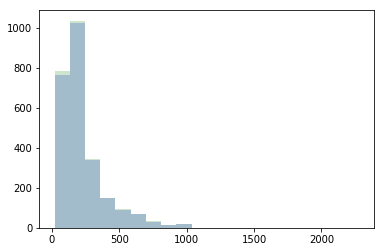

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

len_test_true = [len(x.split()) for x, y in zip(x_test, y_test) if y == 1]
plt.hist(len_test_true, 20, color='b', alpha=0.2)

len_test_pred = [len(x.split()) for x, y in zip(x_test, z) if y == 1]
plt.hist(len_test_pred, 20, color='g', alpha=0.2)